# 0.1 Setup

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path to project folders

path = r'/Users/joefeuille/CF Analysis/Instacart Basket Analysis'

In [3]:
# Setting combo df from Part 1 as combo_df
combo_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combo_opm_cust.pkl'))

# 0.2 Verify

In [4]:
combo_df.shape

(32435070, 36)

In [5]:
combo_df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income,_merge
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


# Q.2 - Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Bar Charts

<AxesSubplot:>

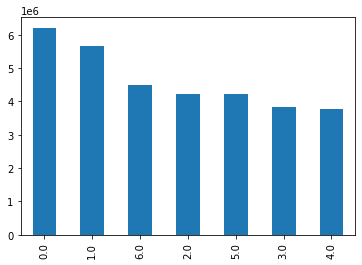

In [9]:
# Creaing a bar chart of Orders DOW using plot.bar()

combo_df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

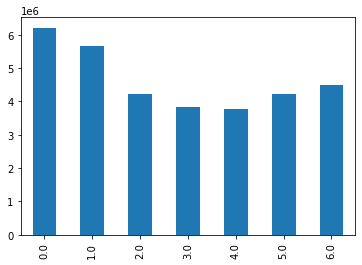

In [10]:
# Same, using sort_index()

combo_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

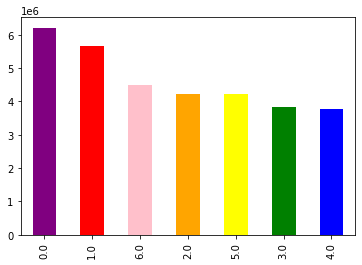

In [11]:
# Same, using color function

combo_df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

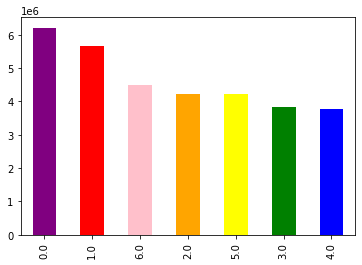

In [12]:
# Naming colored bar chart for exporting

color_bar = combo_df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [13]:
# Exporting bar chart with savefig()

color_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'color_bar_orders_dow.png'))

### Histograms & Scatterplots

<AxesSubplot:ylabel='Frequency'>

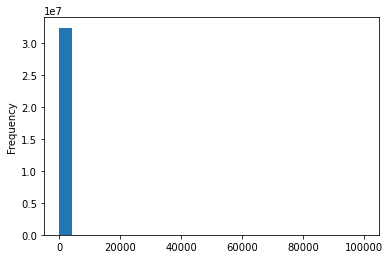

In [14]:
# Creating a histogram of Prices using plot.hist & bars functions

combo_df['prices'].plot.hist(bins = 25)

In [15]:
combo_df['prices'].describe()

count    3.240487e+07
mean     1.198022e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
combo_df['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

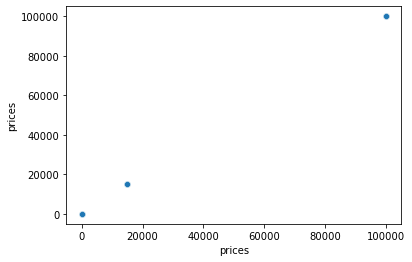

In [17]:
# Creating scatterplot for Prices

sns.scatterplot(x = 'prices', y = 'prices', data = combo_df)

In [6]:
# Isolating outliers

combo_df.loc[combo_df['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income,_merge
7816,1435153.0,1519.0,prior,26.0,2.0,11.0,6.0,False,21553,15.0,...,Craig,Clark,Male,Rhode Island,68.0,3/4/2020,0.0,divorced/widowed,177864.0,both
7817,1066435.0,1519.0,prior,32.0,3.0,10.0,5.0,False,21553,28.0,...,Craig,Clark,Male,Rhode Island,68.0,3/4/2020,0.0,divorced/widowed,177864.0,both
15172,1697208.0,2409.0,prior,33.0,1.0,19.0,5.0,False,21553,1.0,...,Nicole,Odonnell,Female,Hawaii,55.0,11/11/2018,2.0,married,230074.0,both
20294,965345.0,3531.0,prior,27.0,2.0,19.0,8.0,False,33664,2.0,...,Alice,Compton,Female,Hawaii,80.0,10/6/2019,2.0,married,233776.0,both
20528,2943740.0,3793.0,prior,1.0,2.0,9.0,NaN,True,21553,3.0,...,Jerry,Allen,Male,Louisiana,59.0,8/23/2019,3.0,married,182933.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333838,3265389.0,51346.0,prior,4.0,1.0,17.0,13.0,False,33664,2.0,...,nan,Gould,Male,Rhode Island,58.0,1/25/2019,1.0,married,207497.0,both
32337924,1179092.0,131671.0,prior,12.0,4.0,9.0,15.0,False,33664,1.0,...,Diana,Hansen,Female,Rhode Island,35.0,8/4/2018,0.0,single,86490.0,both
32340853,1226705.0,39667.0,prior,7.0,2.0,15.0,20.0,False,33664,14.0,...,Johnny,Colon,Male,Rhode Island,78.0,5/8/2019,2.0,married,195077.0,both
32360118,3000037.0,95105.0,prior,2.0,4.0,19.0,22.0,False,33664,4.0,...,Catherine,Browning,Female,South Carolina,48.0,1/18/2017,2.0,married,398880.0,both


In [7]:
# Using np.nan to remove outlying data from calculations

combo_df.loc[combo_df['prices'] > 100, ['prices']] = np.nan

In [20]:
# Checking for new max values

combo_df['prices'].max()

25.0

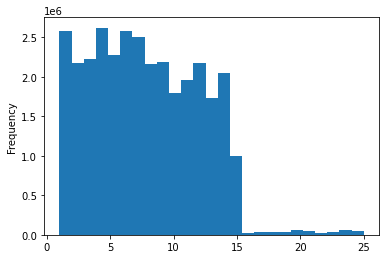

In [21]:
# Retrying the histogram

hist = combo_df['prices'].plot.hist(bins = 25)

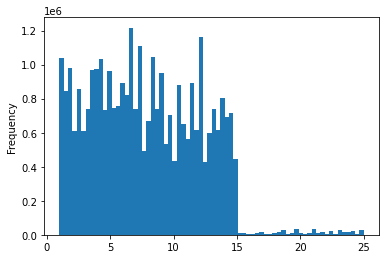

In [22]:
# Changing the histogram's granularity

hist_2 = combo_df['prices'].plot.hist(bins = 70)

In [23]:
# Exporting hist

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices_combo.png'))

In [24]:
# Exporting hist_2

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram2_prices_combo.png'))

### Line Charts

##### Creating Sample Set

In [4]:
# Creating random number values with seed(4)

np.random.seed(4)
dev = np.random.rand(len(combo_df)) <= 0.7

In [5]:
# Sorting results into two sample sets

biggie = combo_df[dev]
smalls = combo_df[~dev]

In [6]:
# Checking sample sets using len()

len(combo_df)

32435070

In [7]:
len(biggie) + len(smalls)

32435070

In [9]:
# Creating new df from Smalls with only Orders DOW & Prices columns

test_df_1 = smalls[['orders_day_of_week', 'prices']]

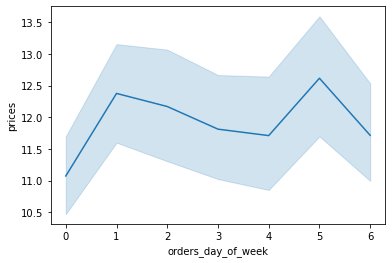

In [10]:
# Creating a line chart using sns.lineplot()

line_1 = sns.lineplot(x = 'orders_day_of_week', y = 'prices', data = test_df_1)

# Q.3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. 

##  In a markdown cell beneath your histogram, describe what the histogram demonstrates.

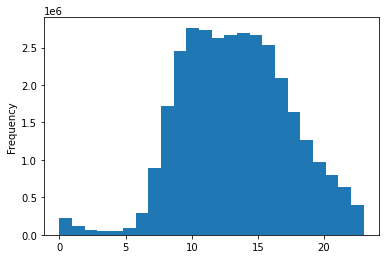

In [12]:
# Creating initial histogram for Order Time of Day variable, using 24 bins for 24 hours/day

histo_1 = combo_df['order_time_of_day'].plot.hist(bins = 24)

### It appears that our peak ordering hours are from 10am to about 3pm. Orders begin a steady decline around 4pm until the end of day.

### Our slowest ordering hours fall between 12am and 7am, while most of our clients are likely asleep.

### Utilizing our knowledge of peak ordering hours enables us to make data-informed decisions about staff scheduling in order to fulfill customer orders as efficiently as possible.

### Similarly, we can utilize our slowest hours to schedule product deliveries to the store and schedule staff to restock shelves and monitor inventory, preparing for the day's incoming orders.

# Q.4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

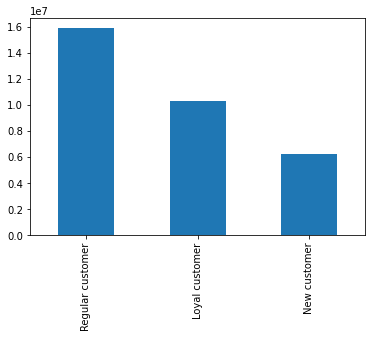

In [13]:
# Creating bar chart for Loyalty Flag variable

bar_loyalty = combo_df['loyalty_flag'].value_counts().plot.bar()

# Q.5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [14]:
# Creating new df from Smalls (our accurate sample set)
# with only Order Time of Day & Prices columns

test_df_2 = smalls[['order_time_of_day', 'prices']]

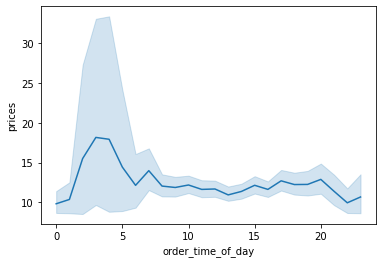

In [15]:
# Creating a line chart using sns.lineplot() with new variables

line_2 = sns.lineplot(x = 'order_time_of_day', y = 'prices', data = test_df_2)

# Q.6 - Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: 

## In a markdown cell beneath your line chart, describe what the line chart shows.


In [18]:
# Creating new df from Smalls (our accurate sample set)
# with only Age & Number Dependants columns

test_df_3 = smalls[['age', 'number_dependants']]

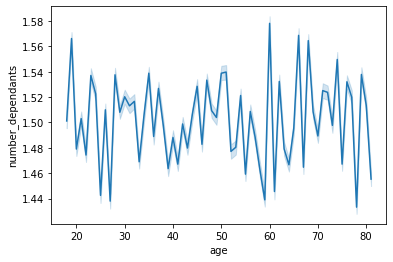

In [19]:
# Creating a line chart using sns.lineplot() with new variables

line_3 = sns.lineplot(x = 'age', y = 'number_dependants', data = test_df_3)

In [20]:
# Creating random number values with seed(4)

np.random.seed(10)
dev2 = np.random.rand(len(combo_df)) <= 0.7

In [21]:
# Sorting results into two new sample sets

gordo = combo_df[dev2]
tiny = combo_df[~dev2]

In [22]:
# Creating new df from Tiny (our accurate sample set)
# with only Age & Number Dependants columns

test_df_4 = tiny[['age', 'number_dependants']]

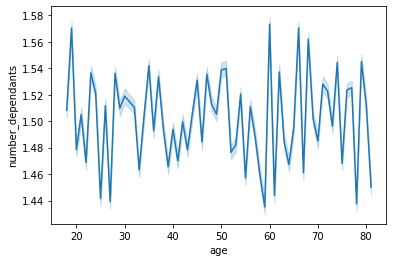

In [23]:
# Creating a line chart using sns.lineplot() with Tiny

line_4 = sns.lineplot(x = 'age', y = 'number_dependants', data = test_df_4)

### After creating the line chart for age v. number of dependants twice, with two separate sample sets, the results are similar. There does not appear to be reliable correlation between age and number of dependants. For our customers, the number of dependants can vary significantly for any given age. Therefore, the age of the customer will not readily predict the number of dependants in their home (and likely won't predict to larger grocery purchases).

# Q.7 - You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

##  In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<AxesSubplot:xlabel='age', ylabel='income'>

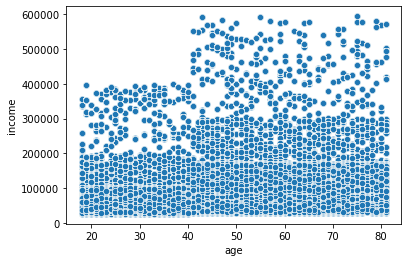

In [8]:
# Creating scatterplot for Age v. Income

sns.scatterplot(x = 'age', y = 'income', data = combo_df)

In [9]:
combo_df['age'].min()

18.0

In [10]:
combo_df['age'].max()

81.0

In [11]:
combo_df['income'].min()

25903.0

In [12]:
combo_df['income'].max()

593901.0

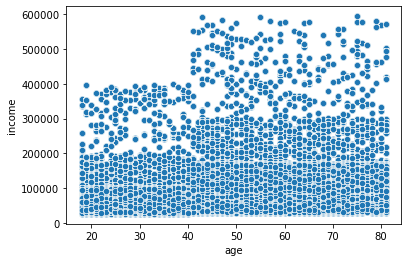

In [13]:
age_income_scplot = sns.scatterplot(x = 'age', y = 'income', data = combo_df)

### According to our scatterplot, there are a few common trends between two age groups: ages 18 - 40, ages 41+.

### Among customers aged 18-40, income is most commonly 200,000 dollars and lower, with a maximum income of about 400,000 dollars.

### For customers aged 41 and older, income most commonly falls 300,000 dollars and lower, with a maximum income of about 600,000 dollars.

### Customer ages range between 18 (minimum) and 81 (maximum).

### Customer income ranges between 25,903 (minimum) and 593,901 (maximum) dollars.

# Q.8 - Export your visualizations as “.png” files in your relevant project folder.

In [41]:
# Exporting lineplot of Orders DOW & Prices from Q.2

line_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot-orders_dow_v_prices.png'))

In [42]:
# Exporting Time of Day histogram from Q.3

histo_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram-orders_time_of_day.png'))

In [43]:
# Exporting Loyalty bar chart from Q.4

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-loyalty.png'))

In [44]:
# Exporting Expenditure line chart from Q.5

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot-expenditures_v_time_of_day.png'))

In [45]:
# Exporting Age v. Dependants linechart from Q.6

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot-age_v_dependants.png'))

In [46]:
# Exporting second Age v. Dependants linechart from Q.6

line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot-age_v_dependants_2.png'))

In [14]:
# Exporting Scatterplot from Q.7

age_income_scplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot-age_v_income.png'))

# Q.9 - Save your notebook from part 2 of this Exercise’s task.

In [15]:
# Exporting combo_df df as "combo_df_2"

combo_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combo_df_2.pkl'))